# Rozwiązanie zadań poniżej 
# Logistic Regression with Python

Spróbujemy przeprowadzić klasyfikację.

Użyjemy oczyszczonej wersji zestawu danych Titanic.

Klasy: przeżycie lub śmierć.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dane

In [8]:
train = pd.read_csv('titanic_train.csv')

# Exploratory Data Analysis

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot: xlabel='Survived', ylabel='count'>

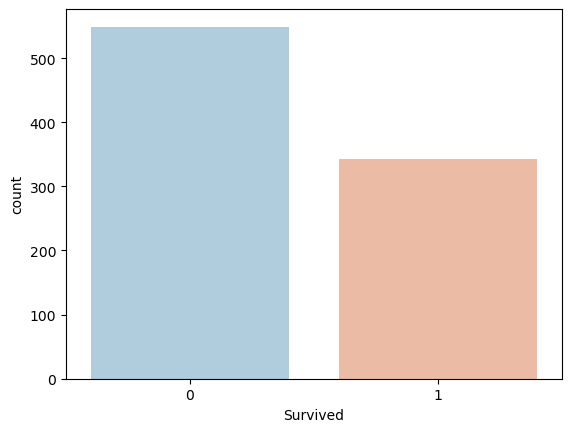

In [6]:
sns.countplot(x='Survived', data=train, palette='RdBu_r')

<AxesSubplot: xlabel='Survived', ylabel='count'>

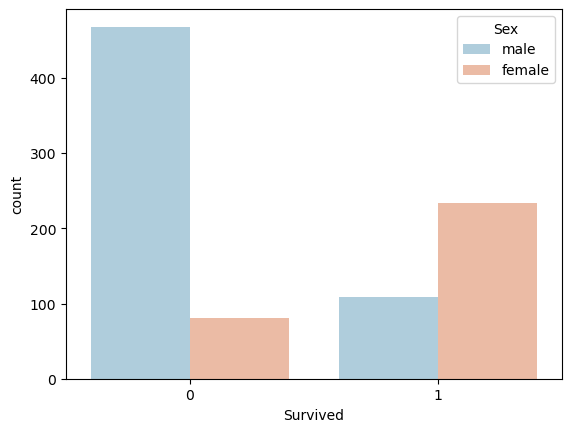

In [7]:
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

<AxesSubplot: xlabel='Survived', ylabel='count'>

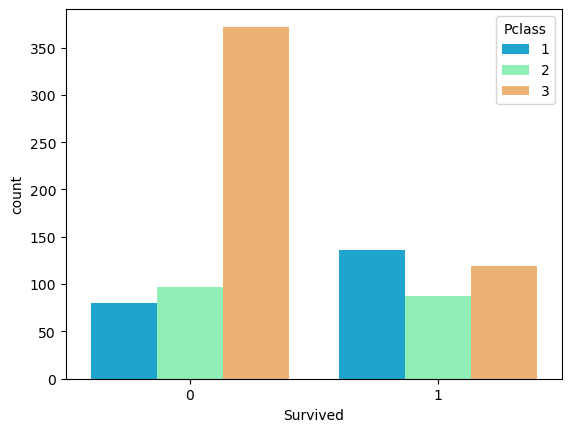

In [8]:
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

<AxesSubplot: >

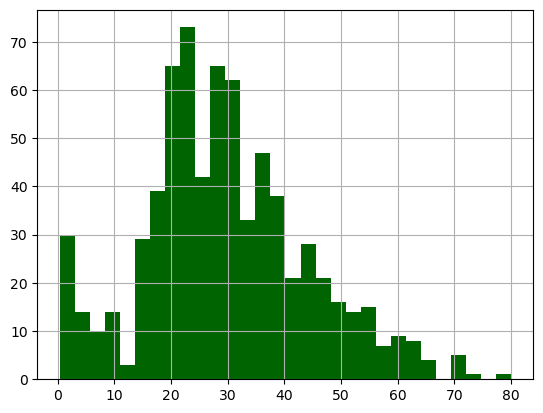

In [9]:
train['Age'].hist(bins=30, color='darkgreen', alpha=1)

<AxesSubplot: >

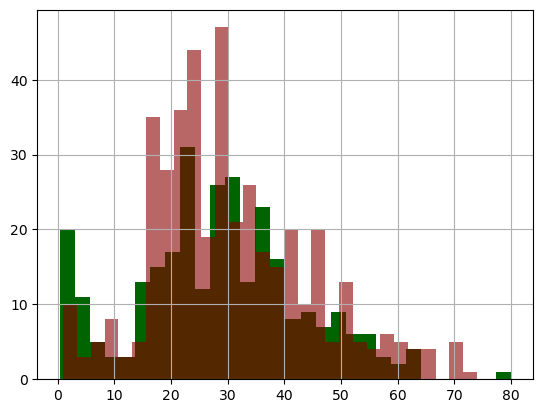

In [10]:
plt.clf()
train[train.Survived == 1]['Age'].hist(bins=30, color='darkgreen', alpha=1)
train[train.Survived == 0]['Age'].hist(bins=30, color='darkred', alpha=0.6)

___
## Data Cleaning

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

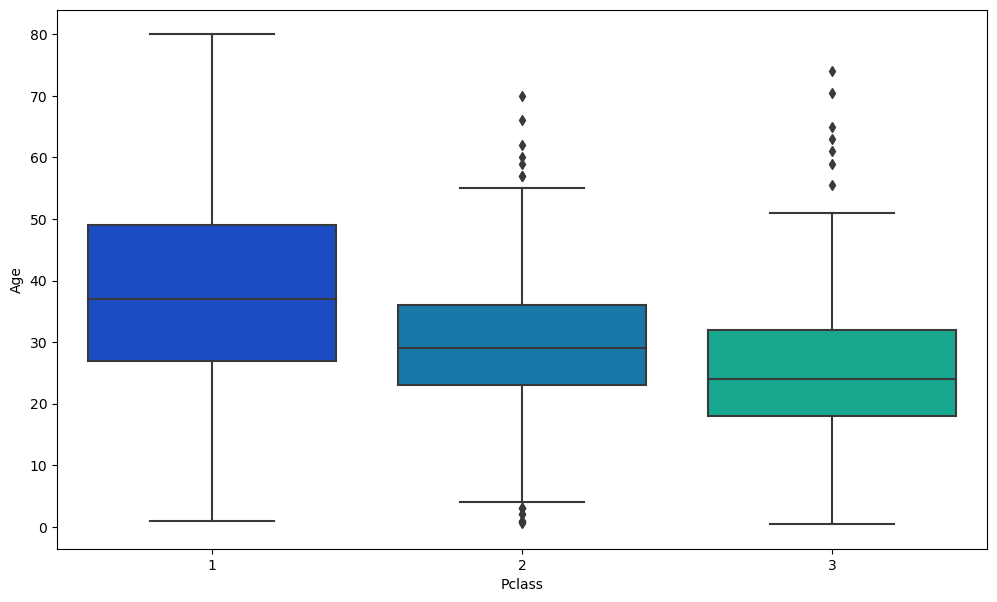

In [11]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1: return 37
        elif Pclass == 2: return 29
        else: return 24
    else:
        return Age

In [13]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

In [14]:
train.drop(['Cabin'], axis=1, inplace=True)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Converting Categorical Features (pd.get_dummies)

In [16]:
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [17]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [18]:
train.drop(['Sex', 'Embarked', 'Name','Ticket'], axis=1, inplace=True)

In [19]:
train = pd.concat([train, sex, embark], axis=1)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Zadanie 1 (2 pkt)
Odpowiedz na pytania:

    a) Jaka jest róznica pomiedzy regresja liniową a regresją logistyczną? (1 pkt)

        Regresja liniowa służy do przewidywania wartości zmiennej zależnej (Y), gdy ta przyjmuje wartości ciągłe. 
        Regresja logistyczna przewiduje wartość zmiennej zależnej Y, gdy ta jest zmienną kategoryczną. 

    b) Na czym polega regresja logistyczna? (nie podawaj ksiązkowej definicji, opisz krótko własnymi słowami) (1 pkt)

        Regresja logistyczna jest jedną z podstawowych metod klasyfikacji, używana, gdy zmienna zależna Y jest zmienną 
        kategoryczną (określa prawdopodobieństwo przynależności do danej klasy). Funkcja określająca przynależność do danej klasy
        ma kształt sigmoidu, przyjmuje wartości binarne (0 - brak przynależności do klasy i 1 - przynależność do danej kategorii/klasy).

## Zadanie 2 (8 pkt)
Dokończ ćwiczenie rozpoczęte na zajęciach warsztatowych (notebook 3_regresja_logistyczna_cwiczenie.ipynb) - 
wykorzystując przeprocesowane podczas zajęc dane titanic_train.csv, zbuduj model przyporządkowujący pasazerom jedna z klas: przezycie, smierc.

    a) (Train Test Split) podziel zbiór na część testową i treningową (1 pkt)
    b) (Training and Predicting) dopasuj model regresji logistycznej i wyznacz klasy dla pasazerow z czesci testowej (2 pkt)
    c) (Ewaluacja) wykorzystując znane Ci odpowiednie metody ewaluacji - oceń zbudowany model (2.5 pkt)
    d) (Wnioski) skomentuj uzyskane wyniki (2.5 pkt)


# Budowa modelu

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    uint8  
 8   Q            891 non-null    uint8  
 9   S            891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [55]:
data = np.array(train.iloc[:,2:])
labels = np.array(train.iloc[:,0])
target = np.array(train.iloc[:,1])
train_set = {"data":data,"target":target, "labels":labels}

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    train_set["data"],
    train_set["target"],
    test_size=0.333, 
    random_state=42)

## Training and Predicting

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [79]:
# Skalowanie danych
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train) 
X_test_std = scaler.transform(X_test)

In [80]:
# Predykcja modeli
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_std, y_train)
y_pred_test = model.predict(X_test_std)
y_pred_train = model.predict(X_train_std)

## Ewaluacja

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, plot_confusion_matrix
from sklearn import metrics

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{report}")
    plot_confusion_matrix(model, X_train, y_train)
    plt.show()
    print("------------------------------------------------------------------------")

    print("TESTING RESULTS: \n===============================")
    report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{report}")
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[323  49]
 [ 71 151]]
ACCURACY SCORE:
0.7980
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.819797    0.75500   0.79798    0.787398      0.795580
recall       0.868280    0.68018   0.79798    0.774230      0.797980
f1-score     0.843342    0.71564   0.79798    0.779491      0.795615
support    372.000000  222.00000   0.79798  594.000000    594.000000


c:\Users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


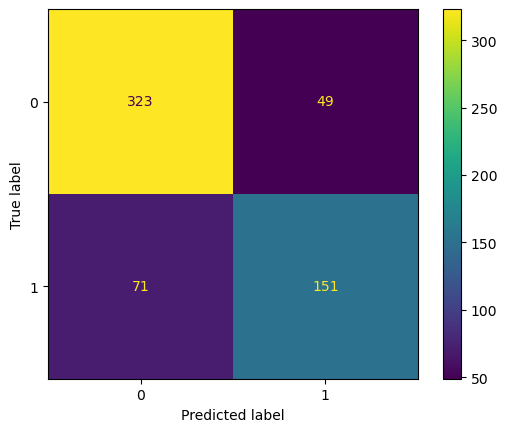

------------------------------------------------------------------------
TESTING RESULTS: 
CONFUSION MATRIX:
[[156  21]
 [ 31  89]]
ACCURACY SCORE:
0.8249
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.834225    0.809091  0.824916    0.821658      0.824070
recall       0.881356    0.741667  0.824916    0.811511      0.824916
f1-score     0.857143    0.773913  0.824916    0.815528      0.823515
support    177.000000  120.000000  0.824916  297.000000    297.000000


c:\Users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


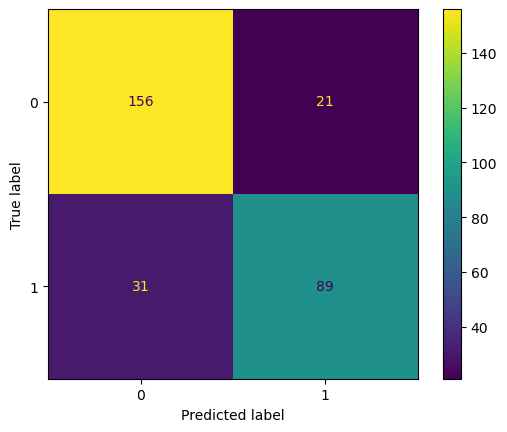

In [82]:
evaluate(model, X_train_std, X_test_std, y_train, y_test)

## Wnioski

Dokładność predykcji dla danych treningowych (79%) jest mniejsza niż dla danych testowych (83%) - model nie jest przeuczony.


Feature 0: Pclass, Score: -0.76083
Feature 1: Age, Score: -0.39708
Feature 2: SibSp, Score: -0.34382
Feature 3: Parch, Score: -0.07950
Feature 4: Fare, Score: 0.13199
Feature 5: male, Score: -1.20795
Feature 6: Q, Score: -0.09248
Feature 7: S, Score: -0.28722


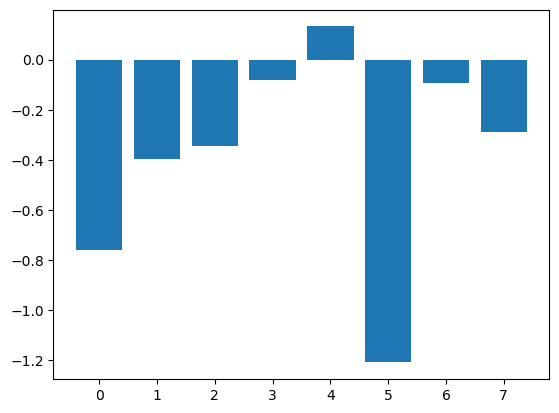

In [120]:
import matplotlib.pyplot as plt

feature_labels = []
for column in train.columns:
    feature_labels.append(column)
feature_labels = feature_labels[2:]

feature_importance = model.coef_[0]

for i,v in enumerate(importance):
    print(f"Feature {i}: {feature_labels[i]}, Score: {v:.5f}")

plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.show()

Pozytywne wyniki wskazują na cechę, która przewiduje klasę 1 (ocaleni), natomiast negatywne wyniki wskazują na cechę, która przewiduje klasę 0 (ofiary). \
Z danych wynika, że głównymi czynnikami mającymi wpływ na to czy ktoś ocalał czy nie są płeć i klasa, którą podróżował.